In [1]:
import pandas as pd

### Zbadanie zbioru

In [2]:
df = pd.read_csv('ng20_all.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.0,15.728111,9.099586,0.259395,5.156905,0.000000,0.0,0.000000,7.731676,0.000000,...,11.612481,0.000000,3.256385,0.0,0.000000,7.129995,0.000000,3.373063,0.0,9
1,0.0,0.000000,0.000000,0.000000,0.000000,14.229717,0.0,0.000000,0.000000,0.000000,...,0.000000,2.213775,0.000000,0.0,0.000000,0.000000,2.523506,2.307943,0.0,4
2,0.0,0.000000,0.000000,72.029411,0.000000,0.000000,0.0,0.000000,0.000000,56.773968,...,0.000000,0.000000,0.000000,0.0,0.000000,136.649582,0.000000,0.000000,0.0,11
3,0.0,0.000000,0.000000,0.000000,0.000000,14.833830,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.940317,0.000000,0.0,4
4,0.0,0.000000,0.000000,0.000000,4.875045,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.780793,0.000000,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.0,0.000000,0.248722,0.000000,0.000000,3.898138,0.0,2.554687,0.000000,4.410306,...,0.000000,0.000000,0.000000,0.0,0.000000,0.785907,0.000000,0.000000,0.0,12
18842,0.0,0.000000,0.000000,0.000000,0.320675,0.000000,0.0,3.230011,0.000000,0.000000,...,0.000000,1.078652,0.000000,0.0,2.671853,0.000000,0.113560,0.000000,0.0,8
18843,0.0,0.000000,0.000000,0.000000,0.000000,0.860070,0.0,1.224586,0.000000,0.457255,...,0.000000,0.000000,0.000000,0.0,0.303810,0.000000,0.000000,0.000000,0.0,4
18844,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,8.226898,0.000000,0.0,5.754258,0.000000,0.000000,0.000000,0.0,6


In [3]:
labels = len(set(df[128]))
print('All labels: ', labels)
df[128]

All labels:  20


0         9
1         4
2        11
3         4
4         0
         ..
18841    12
18842     8
18843     4
18844     6
18845     7
Name: 128, Length: 18846, dtype: int64

### Zadanie 2

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV
import numpy as np

In [5]:
Y = np.array(df[128])
X = np.array(df[range(128)])

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [6]:
# initialization
mlp_clf = MLPClassifier(hidden_layer_sizes=(64,64,128,128,128,20))
ada_clf = AdaBoostClassifier(n_estimators=30, random_state=0, base_estimator=RandomForestClassifier(n_estimators=30, n_jobs=4))

In [68]:
# cv = GridSearchCV(estimator=ada_clf, param_grid = {'best_estimator': [RandomForestClassifier(n_estimators=20, n_jobs=4), 
#                                                                      DecisionTreeClassifier(max_depth=1),
#                                                                      SVC]})

In [69]:
# training 
mlp_clf.fit(X_train, Y_train)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [70]:
# prediction
Y_mlp = mlp_clf.predict(X_test)
Y_ada = ada_clf.predict(X_test)

In [71]:
print('Neural network accuracy:', accuracy_score(Y_mlp, Y_test))
print('AdaBoost accuracy:', accuracy_score(Y_ada, Y_test))

Neural network accuracy: 0.9307692307692308
AdaBoost accuracy: 0.9403183023872679


### Zadanie 3

In [7]:
from random import randint

In [8]:
def create_mlp():
    return MLPClassifier(hidden_layer_sizes=(64,64,128,128,128,20))
def create_ada():
    return AdaBoostClassifier(n_estimators=30, random_state=0, base_estimator=RandomForestClassifier(n_estimators=30, n_jobs=4))

In [78]:
noise_rate = [.1, .2, .3]
lower_bound = 0
upper_bound = 19

for rate in noise_rate:
    X_unchanged, X_to_mix, Y_unchanged, Y_to_mix = train_test_split(X_train, Y_train, test_size=rate, random_state=1)
    Y_with_noise = []
    for y in Y_to_mix:
        new = y
        while new == y:
            new = randint(lower_bound, upper_bound)
        Y_with_noise.append(new)
    X_new_train = np.concatenate((X_unchanged, X_to_mix), axis=0)
    Y_new_train = np.concatenate((Y_unchanged, np.array(Y_with_noise)), axis=0)
    
    mlp_clf = create_mlp()
    ada_clf = create_ada()
    
    mlp_clf.fit(X_new_train, Y_new_train)
    ada_clf.fit(X_new_train, Y_new_train)
    
    Y_mlp = mlp_clf.predict(X_test)
    Y_ada = ada_clf.predict(X_test)
    
    print('rate:',rate )
    print('mlp accuracy:', accuracy_score(Y_mlp, Y_test))
    print('ada accuracy:', accuracy_score(Y_ada, Y_test))    

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


rate: 0.1
mlp accuracy: 0.8989389920424403
ada accuracy: 0.940053050397878


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


rate: 0.2
mlp accuracy: 0.8679045092838197
ada accuracy: 0.9363395225464191


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


rate: 0.3
mlp accuracy: 0.8161803713527851
ada accuracy: 0.9352785145888595


#### wnioski: 

### Zadanie 4

In [9]:
from sklearn.decomposition import PCA

In [ ]:
n_components = [ 40, 64, 128]
for n in n_components:
    print(n)
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("transformed")
    #compare
    mlp_clf = create_mlp()
    ada_clf = create_ada()

    mlp_clf.fit(X_train_pca, Y_train)
    ada_clf.fit(X_train_pca, Y_train)
    
    Y_mlp = mlp_clf.predict(X_test_pca)
    Y_ada = ada_clf.predict(X_test_pca)
    
    print('components:', n )
    print('mlp accuracy:', accuracy_score(Y_mlp, Y_test))
    print('ada accuracy:', accuracy_score(Y_ada, Y_test)) 
    
    

In [10]:
#### wnioski:

### Zadanie 5

In [16]:
from sklearn.model_selection import cross_val_score 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [15]:
metrics = ['accuracy', 'f1_weighted', 'neg_log_loss', ]

scores = {}

for metric in metrics:
    ada_scores = cross_val_score(estimator=create_ada(), X=X_train, y=Y_train, scoring=metric, cv=5, n_jobs=-1)
    mlp_scores = cross_val_score(estimator=create_mlp(), X=X_train, y=Y_train, scoring=metric, cv=5, n_jobs=-1)
    scores[metric] = (ada_scores, mlp_scores)
    
print(scores)

{'accuracy': (array([0.93567639, 0.93266998, 0.94361526, 0.93466003, 0.94162521]), array([0.93236074, 0.92437811, 0.93963516, 0.93399668, 0.93399668])), 'f1_weighted': (array([0.9351519 , 0.93803327, 0.94328645, 0.93832664, 0.94199466]), array([0.93004426, 0.92888834, 0.93677419, 0.93627745, 0.93092273])), 'neg_log_loss': (array([-0.44766536, -0.47844362, -0.34911544, -0.46917296, -0.36800074]), array([-0.45238728, -0.65081473, -0.28970214, -0.334102  , -0.42365585]))}


In [20]:
for metric, v in scores.items():
    ada, mlp = v
    scores[metric] = (np.mean(ada), np.mean(mlp))
print(scores)

{'accuracy': (0.9376493747003268, 0.9328734752409483), 'f1_weighted': (0.9393585842912884, 0.9325813920351435), 'neg_log_loss': (-0.42247962409072504, -0.4301324005283787)}


### Precision-Recall

In [ ]:
Y_train_bin = label_binarize(Y_train, classes=[*range(n)])
Y_test_bin = label_binarize(Y_test, classes=[*range(n)])
n = 20

#####  MLP

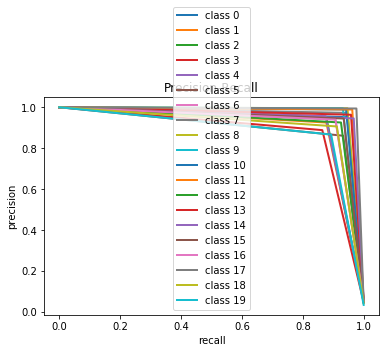

In [17]:
cls = OneVsRestClassifier(estimator=create_mlp())
cls.fit(X_train, Y_train_bin)
pred = cls.predict(X_test)

prec = dict()
rec = dict()
for i in range(n):
    prec[i], rec[i], _ = precision_recall_curve(Y_test_bin[:, i], pred[:, i])
    plt.plot(rec[i], prec[i], lw=2, label='class {}'.format(i))
plt.rcParams["figure.figsize"] = (10,10)    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("Precision-Recall")
plt.show()

#####  AdaBoost

In [ ]:
cls = OneVsRestClassifier(estimator=create_ada())
cls.fit(X_train, Y_train_bin)
pred = cls.predict(X_test)

prec = dict()
rec = dict()
for i in range(n):
    prec[i], rec[i], _ = precision_recall_curve(Y_test_bin[:, i], pred[:, i])
    plt.plot(rec[i], prec[i], lw=2, label='class {}'.format(i))
plt.rcParams["figure.figsize"] = (10,10)    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("Precision-Recall")
plt.show()

### ROC

#####  MLP

In [ ]:
cls = OneVsRestClassifier(estimator=create_mlp())
cls.fit(X_train, Y_train_bin)
pred = cls.predict(X_test)
for i in range(20):
    fpr, tpr, _ = roc_curve(Y_test_bin, pred)
    plt.plot(fpr, tpr, lw=2, label='class {}'.format(i))
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("False positives")
plt.ylabel("True positives")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

#####  AdaBoost

In [ ]:
cls = OneVsRestClassifier(estimator=create_ada())
cls.fit(X_train, Y_train)
pred = cls.predict(X_test)
for i in range(20):
    fpr, tpr, _ = roc_curve(Y_test, pred)
    plt.plot(fpr, tpr)
plt.xlabel("False positives")
plt.ylabel("True positives")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

### Zadanie 6

In [ ]:
from time import time

In [ ]:
mlp_iters = [50, 100, 200]
ada_estimators = [15, 25, 50]

for iters in mlp_iters:
    mlp_clf = create_mlp(iters)
    
    start = time()
    mlp_clf.fit(X_train, Y_train)
    duration = time() - start
    
    Y_mlp = mlp_clf.predict(X_test)
    print("mlp | iters: ", iters, "time:", duration, 
          "accuracy:", accuracy_score(Y_test, Y_mlp),
          "loss", log_loss(Y_test, mlp_clf.predict_proba(X_test)))

    
    
for estimators in ada_estimators:
    ada_clf = create_ada(estimators)
    
    start = time()
    ada_clf.fit(X_train, Y_train)
    duration = time() - start
    
    Y_ada = ada_clf.predict(X_test)
    print("ada | estimators", estimators, "time:", duration, 
          "accuracy:", accuracy_score(Y_test, Y_ada),
          "loss", log_loss(Y_test, ada_clf.predict_proba(X_test)))

### Zadanie 8

In [ ]:
random_forest_clf = RandomForestClassifier(n_jobs = -1)
random_forest_clf.fit(X_train, Y_train)

In [ ]:
random_forest_clf.feature_importances_

In [ ]:
features_importance = [(value, feature_index)  for (feature_index, value) in enumerate(random_forest_clf.feature_importances_)]
features_importance.sort(reverse=True)

features_importance[:20]